# Step 7: 2D Diffusion

Here's the 2-D diffusion equation:

$$
\frac{\partial u}{\partial t} = \nu\frac{\partial^2u}{\partial x^2} + \nu\frac{\partial^2u}{\partial y^2}
$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion. We are going to use the same scheme here, with our forward difference in time and two second-order derivatives.

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}
$$

Once again, we regorganize the discretized equation and solve for $u_{ij}^{n+1}$.

$$
u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
$$



## Analysis

In [2]:
# -------
# Imports
# -------

import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# ---------
# Variables
# ---------

nx = 31
ny = 31
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nt = 17
nu = 0.05
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.copy(u)

# ---------------
# Init Conditions
# ---------------

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

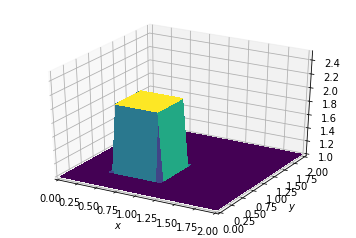

In [4]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [6]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    for n in range(nt + 1):
        un = np.copy(u)
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_zlim(1, 2.5)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

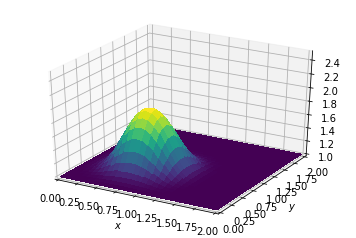

In [7]:
diffuse(nt=10)

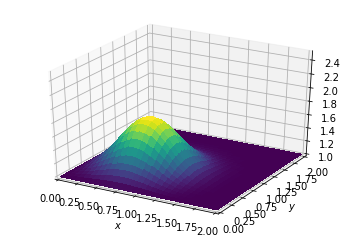

In [8]:
diffuse(nt=20)

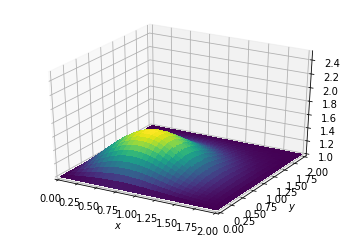

In [10]:
diffuse(nt=50)

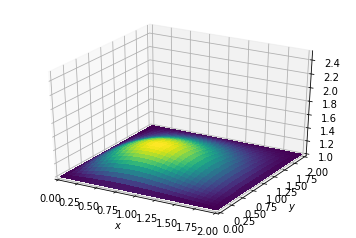

In [11]:
diffuse(nt=100)